This is an ongoing project to practice my data science skills across platforms. 
I have chosen The World Bank's ESG data set as I want to be discovering insights that have global, practical value.
My current drive is to create visualizations that capture the whole picture of a given dataset.

In [1]:
### I AM NOT DOING BIG MATH
### I AM MAKING THE RAW DATA MORE ACCESSIBLE TO THE LAYPERSON
### I AM EMBRACING THE SLOW PACE OF DEVELOPMENT
### I AM FINDING THE EASE OF JOY IN NOT FORCING

### Setup ###
from csv import reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filepath = "/Users/zachpolitz/Desktop/WorldBank_ESG.csv"

### Open data file ###
ESG_opened = open(filepath)
ESG_read = reader(ESG_opened)
ESG_raw = pd.DataFrame(ESG_read)
ESGcols = ESG_raw.iloc[0]
ESG_raw.columns = ESGcols

Cleaning:
- Moving a column '1961' to its proper place.
- Dropping columns: "country code', 'indicator code', and '2050'
- Set row [0] as column names
- Separate Regional and Country data into separate sets

In [2]:
### Move '1961' after '1960' ###
sixty_one = ESG_raw['1961']
sixty_one = sixty_one[1:]
ESG_raw.drop(['1961'], axis = 1,inplace = True)
ESG_raw.insert(loc = 5, column = '1961', value = 0)
ESG_raw['1961'] = sixty_one
ESG_raw['1961'][0] = '1961'

### Drop unused columns ###
ESG_raw.drop(['Country Code','Indicator Code','2050'], axis = 1)

### Name columns ###
ESG_raw = pd.DataFrame(ESG_raw)
ESG_raw.columns = ESG_raw.iloc[0]
ESG = ESG_raw.iloc[1:]

### Separate country and regional data ###
ESG_by_country = ESG.iloc[3082:]
ESG_by_region = ESG.iloc[0:3082]

Reference: Getting unique tags for:
- indicies
- years
- countries
- regions

In [3]:
### Create lists of unique years, indicies, and countries ###
ESG_indicies = ESG['Indicator Name'].unique()
ESG_years = ESG.columns[4:-1]
ESG_countries = ESG_by_country['Country Name'].unique()
ESG_regions = ESG_by_region['Country Name'].unique()

Dictionaries:
- annual null counts: annual_country_nulls > country > year (sum across indicies)
- indes null counts: index_null_counts > country > index (sum across years)




In [4]:
### Reporting density dictionary: years by country ###
annual_null_counts = {}
for country in ESG_countries: 
    year_raw = ESG_by_country[ESG_by_country['Country Name'] == country]
    year_nulls = {}
    for row in ESG_years:
        nulls = sum(year_raw[row] == '')
        year_nulls[row] = nulls
    annual_null_counts[country] = year_nulls

In [5]:
### Reporting density dictionary: years by region ###
annual_null_counts_region = {}
for region in ESG_regions: 
    year_raw = ESG_by_region[ESG_by_region['Country Name'] == region]
    year_nulls = {}
    for row in ESG_years:
        nulls = sum(year_raw[row] == '')
        year_nulls[row] = nulls
    annual_null_counts_region[region] = year_nulls

In [6]:
### Reporting density dictionary: indicies ###
index_null_counts = {}
for country in ESG_countries:
    indicies = ESG_by_country[ESG_by_country['Country Name'] == country]
    index_nulls = {}
    for row in ESG_indicies:
        index = indicies[indicies['Indicator Name'] == row]
        nulls = sum((index == '').sum())
        index_nulls[row] = nulls
    index_null_counts[country] = index_nulls

Exploration: Build plots that give an overview of the dataset
1. A five number summary of reporting globally, across countries (1960-2020)
2. A five number summary of reporting globally, across regions (1960-2020)

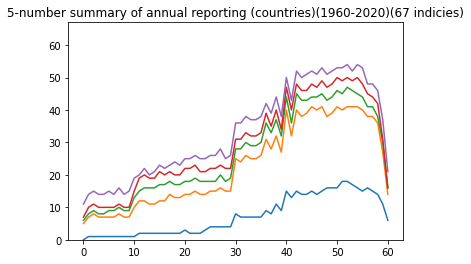

In [7]:
### plot 5-number summary of nulls per year, countries ###
# 5 vectors : min, 25%, median, 75%, max
# rank each year's reporting total per country
# save each metric in separate vector
# plot five vectors together as lines on graph 

mins =       []
two_five =   [] 
medians =    []
seven_five = []
maxs =       []

for year in ESG_years:
    annual_vec = []
    for country in ESG_countries:
       vec = annual_null_counts[country]
       tot = len(ESG_indicies)
       x = tot - vec[year]
       annual_vec.append(x)
    sorted_annual = pd.Series(annual_vec).sort_values()
    an_len = len(sorted_annual)

    mins.append(      sorted_annual.iloc[0])
    two_five.append(  sorted_annual.iloc[round(an_len * .25)])
    medians.append(   sorted_annual.iloc[round(an_len * .5)])
    seven_five.append(sorted_annual.iloc[round(an_len * .75)])
    maxs.append(      sorted_annual.iloc[-1])

plt.title('5-number summary of annual reporting (countries)(1960-2020)(67 indicies)')
plt.ylim(0,67)

plt.plot(mins)
plt.plot(two_five)
plt.plot(medians)
plt.plot(seven_five)
plt.plot(maxs)
plt.show()

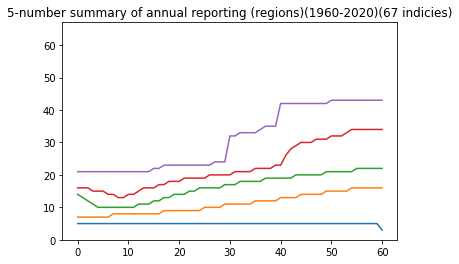

In [10]:
### plot 5-number summary of nulls per year, regions ###
# 5 vectors : min, 25%, median, 75%, max
# rank each year's reporting total per region
# save each metric in separate vector
# plot five vectors together as lines on graph 

r_mins =       []
r_two_five =   [] 
r_medians =    []
r_seven_five = []
r_maxs =       []

for year in ESG_years:
    annual_reg_vec = []
    for region in ESG_regions:
       vec = annual_null_counts_region[region]
       tot = len(ESG_indicies)
       x = tot - vec[year]
       annual_vec.append(x)
    sorted_annual = pd.Series(annual_vec).sort_values()
    an_len = len(sorted_annual)

    r_mins.append(      sorted_annual.iloc[0])
    r_two_five.append(  sorted_annual.iloc[round(an_len * .25)])
    r_medians.append(   sorted_annual.iloc[round(an_len * .5)])
    r_seven_five.append(sorted_annual.iloc[round(an_len * .75)])
    r_maxs.append(      sorted_annual.iloc[-1])

plt.title('5-number summary of annual reporting (regions)(1960-2020)(67 indicies)')
plt.ylim(0,67)

plt.plot(r_mins)
plt.plot(r_two_five)
plt.plot(r_medians)
plt.plot(r_seven_five)
plt.plot(r_maxs)
plt.show()